<a href="https://colab.research.google.com/github/parmarsuraj99/10DaysofMLChallenge/blob/master/days/Day5_10DaysOfMLChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-03-27 11:46:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  96.0MB/s    in 0.7s    

2020-03-27 11:46:57 (96.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
!mkdir data
!unzip /content/cats_and_dogs_filtered.zip -d data

Archive:  /content/cats_and_dogs_filtered.zip
   creating: data/cats_and_dogs_filtered/
  inflating: data/cats_and_dogs_filtered/vectorize.py  
   creating: data/cats_and_dogs_filtered/validation/
   creating: data/cats_and_dogs_filtered/train/
   creating: data/cats_and_dogs_filtered/validation/dogs/
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: data/cats_and_dogs_filtered/validati

In [0]:
import os
import gc
import glob
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img

In [9]:
cat_files = glob.glob("*/*/*/*/cat*.jpg")
dog_files = glob.glob("*/*/*/*/dog*.jpg")
random = np.random.randint(0, len(cat_files), 5)
print("Cat shapes")
for cat in random:
    img = load_img(cat_files[cat])
    print(img_to_array(img).shape)

random = np.random.randint(0, len(dog_files), 5)
print("Dog shapes")
for i in random:
    img = load_img(cat_files[i])
    print(img_to_array(img).shape)

Cat shapes
(374, 500, 3)
(419, 500, 3)
(374, 500, 3)
(378, 450, 3)
(499, 459, 3)
Dog shapes
(332, 499, 3)
(248, 320, 3)
(374, 500, 3)
(421, 472, 3)
(375, 499, 3)


In [0]:
batch_size = 32
input_shape = (150, 150)

In [11]:
base_model = tf.keras.applications.resnet.ResNet50(weights=None,
                                                   include_top=False,
                                                   input_shape=(input_shape[0], input_shape[1], 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(1, activation="sigmoid")(x)

model = Model(inputs = base_model.input,
              outputs=predictions)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/data/cats_and_dogs_filtered/train',
        target_size=input_shape,
        batch_size=batch_size,
        class_mode='binary')
validation_generator = valid_datagen.flow_from_directory(
        '/content/data/cats_and_dogs_filtered/validation',
        target_size=input_shape,
        batch_size=batch_size,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_steps_per_epoch = train_generator.n//train_generator.batch_size
valid_steps_per_epoch = validation_generator.n//validation_generator.batch_size

In [16]:
gc.collect()

12

In [0]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

In [18]:
model.compile(optimizer="rmsprop",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"],
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = train_steps_per_epoch,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = valid_steps_per_epoch,
                    callbacks=[reduce_lr])

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


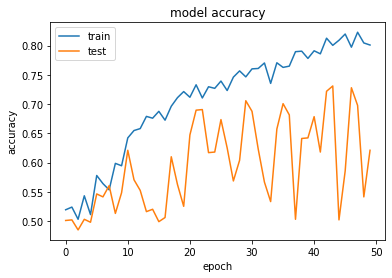

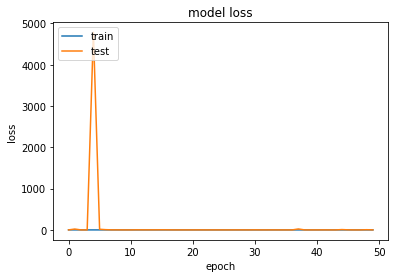

In [25]:
#Pretrained Net
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(input_shape[0], input_shape[1], 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"],
              )

In [0]:
history2 = model.fit_generator(train_generator,
                    steps_per_epoch = train_steps_per_epoch,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = valid_steps_per_epoch,
                    callbacks=[reduce_lr])

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


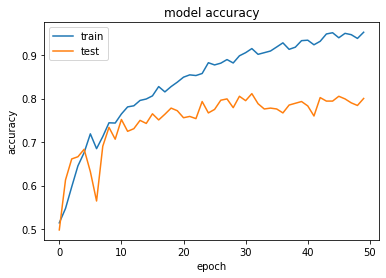

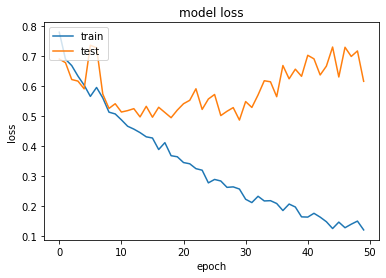

In [37]:
#Pretrained Net
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()